In [1]:
# EDA on Customer Churn Dataset

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

datadf = pd.read_csv('https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/CustomerChurn.csv?raw=True')
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [2]:
datadf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
#check various attributes of data rows * cols, cols and dtypes
print('shape of DF:',datadf.shape)
print('Columns in DF:',datadf.columns)
print('Index of DF:',datadf.index)

shape of DF: (7043, 21)
Columns in DF: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index of DF: RangeIndex(start=0, stop=7043, step=1)


In [4]:
# describe() function to check the statistical summary of numerical columns
#Total charges shpuld be numerical , only int and float are considered or is returned 

datadf.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [5]:
#check if any outliers #sns.countplot(data=datadf[['tenure','MonthlyCharges']])


In [6]:
#check the no of customers churned

datadf['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
#check in % manner:

datadf['Churn'].value_counts() / len(datadf['Churn']) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

           index    0
0     customerID  0.0
1         gender  0.0
2  SeniorCitizen  0.0
3        Partner  0.0
4     Dependents  0.0
                 0
customerID     0.0
gender         0.0
SeniorCitizen  0.0
Partner        0.0
Dependents     0.0


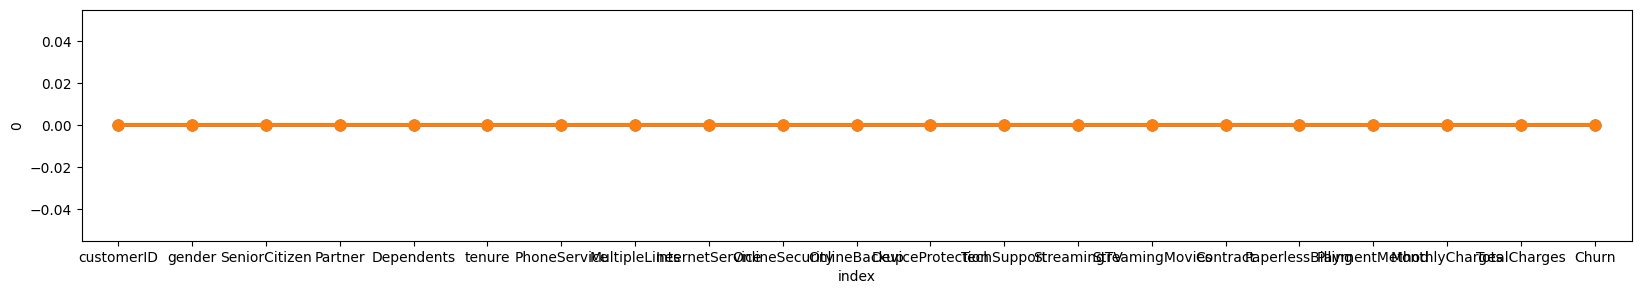

In [22]:
missing = pd.DataFrame(datadf.isnull().sum()*100 / len(datadf)).reset_index()
#print(missing.transpose())
print(missing.head())
plt.figure(figsize=(20,3))

# or 

sns.pointplot(data=missing, x='index', y=0)
missing1 = pd.DataFrame(datadf.isnull().sum()*100 / len(datadf))
sns.pointplot(data=missing1, x=missing1.index, y=0)
print(missing1.head())

In [ ]:
# take a copy from Original DS - common practice
datadf_clean = datadf.copy()


In [ ]:
# convert string to numeric, coerce will convert non numeric to NaN
datadf_clean['TotalCharges'] = pd.to_numeric(datadf_clean['TotalCharges'],errors='coerce')
datadf_clean.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64